## Correlations & Linear Regression Analysis – Hypothesis 1a
Hypothesis 1a: Districts with a greater number of sign requests have a shorter completion duration.
1.	Import libraries & set directory paths
2.	Import Portal data, check dimensions and data types
    - Import: stone_signs_portal_v3.3_saleslets_lifecycle - 26,920.csv
3.	Review variables for correlation:
    -	Correlation matrix
    -	Correlation Heat map
    -	Review using Pair Plots
4.	Hypothesis1a: “Districts with a greater number of sign requests have a shorter completion duration.”.
    -	Scattergraph: Haversine Point vs Completion Duration – low to zero correlation
5.	Proposed scattergraph: No. of Signs per District vs Completion Duration
    -	Import PPD and extract District and Postcode
    -	Combine with Portal data to obtain new District variable.
    -	Export to: stone_signs_portal_v3.4_saleslets_lifecycle - 21,488.csv
    -	Calculate number if signs per district
    -	Calculate average number of sign request completed per district
    -	Export to: stone_signs_portal_v3.5_saleslets_lifecycle_district - 21,488.csv
    -	Display scattergraph: No. of Signs per District vs Completion Duration (-0.47) Moderate correlation.
6.	Linear Regression Analysis  - Note: there are not enough data point to provide an effective linear regression, however it is interesting to see the output.
    -	Create Numpy arrays
    -	Split into Training and Test Set
    -	Make linear prediction
    -	Review summary statistics:
        - Correlation Coefficient or Pearson's r: 
            - the strength of a relationship between the independent and dependent variable (-1 to +1)
        - R-Squared or Coefficient of Determination: 
            - a measure of how well the regression predictions approximate the real data points (%).
        - Root Mean Squared Error (RMSE): 
            - a single measure of predictive accuracy and explains the difference between the actual data points and the predicted data points (value relative to data, small error is better fit).
        - Slope Coefficient:  
            - The regression line fit to the data based on the 'rate of change of y as per X value' (%).
    -	Apply linear regression line to Test set & re-review summary statistics.



### import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

### set directory paths

In [2]:
dataset = r'D:\My Documents\! Omnicompetent Ltd\Career Foundry - Data Analytics\Data Analytics Course\60 Advanced Analytics and Dashboard Design\Stone Signs Portal Analysis\02 Data'
dataset

'D:\\My Documents\\! Omnicompetent Ltd\\Career Foundry - Data Analytics\\Data Analytics Course\\60 Advanced Analytics and Dashboard Design\\Stone Signs Portal Analysis\\02 Data'

In [3]:
vizpath = r'D:\My Documents\! Omnicompetent Ltd\Career Foundry - Data Analytics\Data Analytics Course\60 Advanced Analytics and Dashboard Design\Stone Signs Portal Analysis\04 Analysis'
vizpath

'D:\\My Documents\\! Omnicompetent Ltd\\Career Foundry - Data Analytics\\Data Analytics Course\\60 Advanced Analytics and Dashboard Design\\Stone Signs Portal Analysis\\04 Analysis'

## import dataset: Sales and Letting

In [4]:
df_saleslet = pd.read_csv(os.path.join(dataset,'stone_signs_portal_v3.3_saleslets_lifecycle - 26,920.csv'))
df_saleslet.head()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,request_id,request_datetime,completed_datetime,completed_duration_days,completed_duration_hours,agent_name,agent_code,branch_name,branch_code,sign_category,...,month_no,month,year,work_category,lead_time,request_date,completed_date,requests_per_day,completed_per_day,cycle_count
0,9215,13/10/2020 13:36,18/10/2020 08:52,4.80,115.3,Oakley Property,OAK,OakleyProperty @BrightonLets,701,Letting,...,10,Oct,2020,Letting,Within Week,13/10/2020,18/10/2020,83,26,1
1,8199,26/11/2020 20:33,28/11/2020 11:48,1.64,39.3,Lextons,LEX,Lextons @Hove,600,Sales,...,11,Nov,2020,Sales,Standard 48hr,26/11/2020,28/11/2020,68,90,2
2,8199,18/09/2020 18:44,19/09/2020 14:15,0.81,19.5,Lextons,LEX,Lextons @Hove,600,Sales,...,9,Sep,2020,Sales,Standard 48hr,18/09/2020,19/09/2020,78,66,2
3,9209,13/10/2020 13:29,18/10/2020 08:52,4.81,115.4,Oakley Property,OAK,OakleyProperty @BrightonLets,701,Letting,...,10,Oct,2020,Letting,Within Week,13/10/2020,18/10/2020,83,26,2
4,9209,09/03/2021 11:05,11/03/2021 14:05,2.13,51.0,Oakley Property,OAK,OakleyProperty @BrightonLets,701,Letting,...,3,Mar,2021,Letting,Within Week,09/03/2021,11/03/2021,73,122,2


### check dimensions & data types

In [5]:
df_saleslet.shape

(26920, 46)

In [6]:
df_saleslet.dtypes

request_id                    int64
request_datetime             object
completed_datetime           object
completed_duration_days     float64
completed_duration_hours    float64
agent_name                   object
agent_code                   object
branch_name                  object
branch_code                   int64
sign_category                object
sign_action                  object
board_type                  float64
sign_type                    object
address_1                    object
address_2                    object
address_3                    object
town                         object
postcode                     object
latitude                    float64
longitude                   float64
quantity                      int64
additional_info              object
request_status               object
payment_status               object
net_charge                  float64
vat                         float64
gross_charge                float64
invoice_datetime            

## Explore Data

### create subset for relevant columns only
   display column names as a list (for copy & pasting) for making a subset to explore

In [7]:
df_saleslet.columns

Index(['request_id', 'request_datetime', 'completed_datetime',
       'completed_duration_days', 'completed_duration_hours', 'agent_name',
       'agent_code', 'branch_name', 'branch_code', 'sign_category',
       'sign_action', 'board_type', 'sign_type', 'address_1', 'address_2',
       'address_3', 'town', 'postcode', 'latitude', 'longitude', 'quantity',
       'additional_info', 'request_status', 'payment_status', 'net_charge',
       'vat', 'gross_charge', 'invoice_datetime', 'paid_datetime',
       'payment_duration_days', 'haversine_distance_miles', 'latitude_group',
       'longitude_group', 'zone', 'zone_area', 'is_up', 'month_no', 'month',
       'year', 'work_category', 'lead_time', 'request_date', 'completed_date',
       'requests_per_day', 'completed_per_day', 'cycle_count'],
      dtype='object')

In [8]:
df_sub_saleslet = df_saleslet[['completed_duration_days', 'branch_code', 'latitude','longitude',
                      'payment_duration_days','haversine_distance_miles', 'month_no', 'year', 
                      'requests_per_day', 'completed_per_day', 'cycle_count',]]
df_sub_saleslet.columns

Index(['completed_duration_days', 'branch_code', 'latitude', 'longitude',
       'payment_duration_days', 'haversine_distance_miles', 'month_no', 'year',
       'requests_per_day', 'completed_per_day', 'cycle_count'],
      dtype='object')

### create correlation matrix (using pandas)

In [9]:
df_sub_saleslet.corr()

,completed_duration_days,branch_code,latitude,longitude,payment_duration_days,haversine_distance_miles,month_no,year,requests_per_day,completed_per_day,cycle_count
completed_duration_days,1.000000,0.016916,-0.006524,0.007681,0.069474,-0.004899,-0.001502,-0.106306,0.020221,-0.061638,-0.016761
branch_code,0.016916,1.000000,-0.265051,0.975084,0.098580,-0.299118,0.002961,-0.004737,0.000870,0.239494,0.057868
latitude,-0.006524,-0.265051,1.000000,-0.204694,0.000104,0.999185,0.003785,-0.009024,0.034396,-0.028906,-0.045574
longitude,0.007681,0.975084,-0.204694,1.000000,0.100366,-0.241171,0.001779,-0.002949,0.006749,0.249431,0.042156
payment_duration_days,0.069474,0.098580,0.000104,0.100366,1.000000,-0.003372,0.091710,-0.404535,0.050508,-0.028026,0.002289
haversine_distance_miles,-0.004899,-0.299118,0.999185,-0.241171,-0.003372,1.000000,0.003619,-0.009124,0.033740,-0.037829,-0.045707
month_no,-0.001502,0.002961,0.003785,0.001779,0.091710,0.003619,1.000000,-0.367791,-0.073545,-0.054852,0.049376
year,-0.106306,-0.004737,-0.009024,-0.002949,-0.404535,-0.009124,-0.367791,1.000000,-0.034181,0.111455,-0.033259
requests_per_day,0.020221,0.000870,0.034396,0.006749,0.050508,0.033740,-0.073545,-0.034181,1.000000,0.315778,0.025744
completed_per_day,-0.061638,0.239494,-0.028906,0.249431,-0.028026,-0.037829,-0.054852,0.111455,0.315778,1.000000,0.030030


### create heatmap:
    1) define the axis and figure size, 
    2) create heatmap

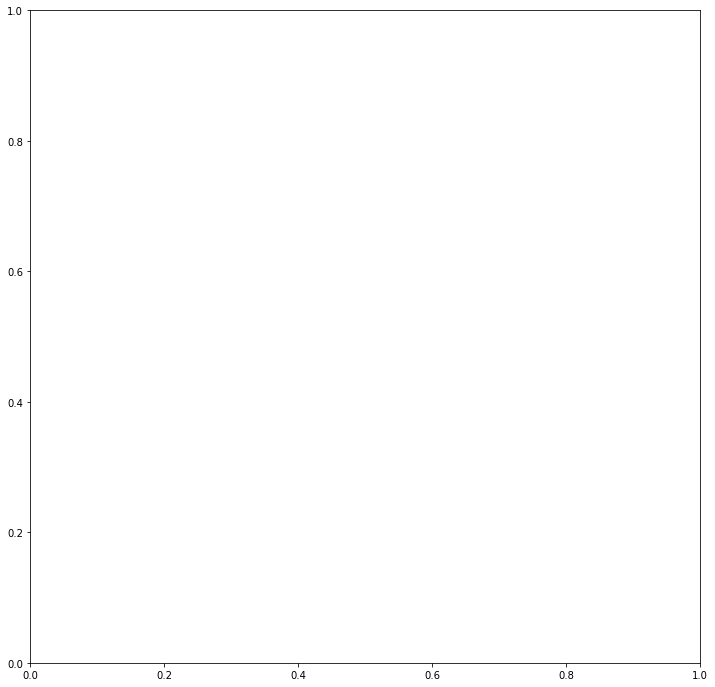

In [10]:
fig_size,axis = plt.subplots(figsize=(12,12))

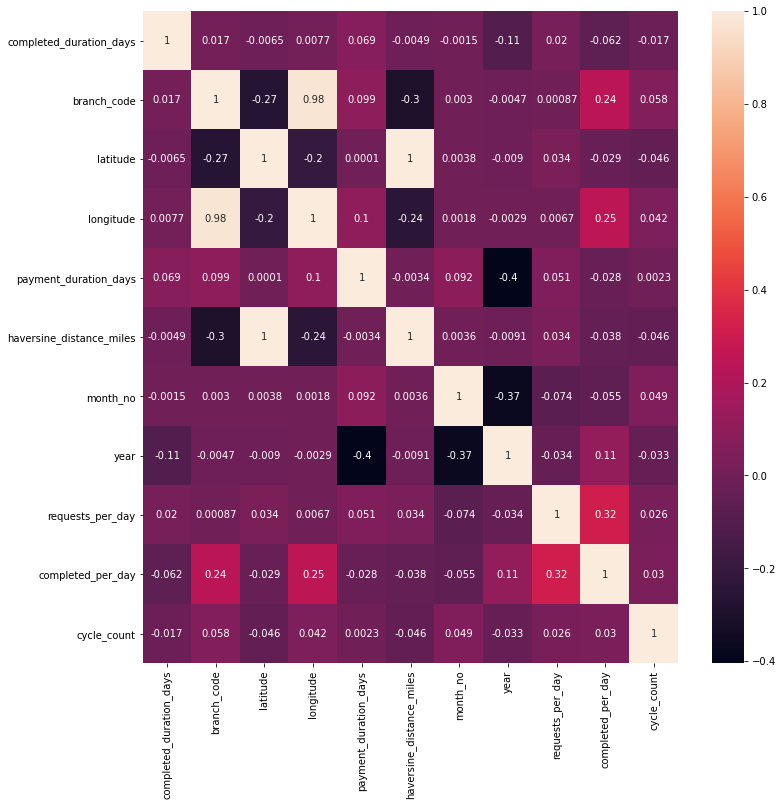

<Figure size 432x288 with 0 Axes>

In [11]:
corr = sns.heatmap(df_sub_saleslet.corr(), annot= True, ax= axis)
plt.tight_layout()
corr.figure

# The `annot` argument places the correlation coefficients onto the heatmap.

### export heatmap

In [12]:
corr.figure.savefig(os.path.join(vizpath,'Heatmap V2.png'))

#### correlation observations:
   - There is a week correlation (0.2) between Branch code and number of signs completed per day.  Branch code is based on office location.
   - There is a week negative correlation (-0.37) between Payment Duration and the year, although there has been less than 2 years of data, so this is just to chance.
   - The correlation between Haversine Distance and latitude & logitude is becasue the Harvesine point has been derrived from latitude & longitude.
   - There is a 0.35 correlation between the number of requests made per day and the number of request completed, this represent supply and demand.
#### In summary: weak to no linear correlations

## Pair Plots - Combining Scatterplot with Histogram

### create subset of relevant variables only

In [8]:
df_sub_saleslet2 = df_saleslet[['completed_duration_days','payment_duration_days',
'haversine_distance_miles', 'requests_per_day', 'completed_per_day', 'cycle_count']]
df_sub_saleslet2.head()

,completed_duration_days,payment_duration_days,haversine_distance_miles,requests_per_day,completed_per_day,cycle_count
0,4.80,41.8,3508.926836,83,26,1
1,1.64,68.3,3508.978003,68,90,2
2,0.81,71.8,3508.978003,78,66,2
3,4.81,41.8,3509.207113,83,26,2
4,2.13,25.1,3509.207113,73,122,2


### create a pair plot

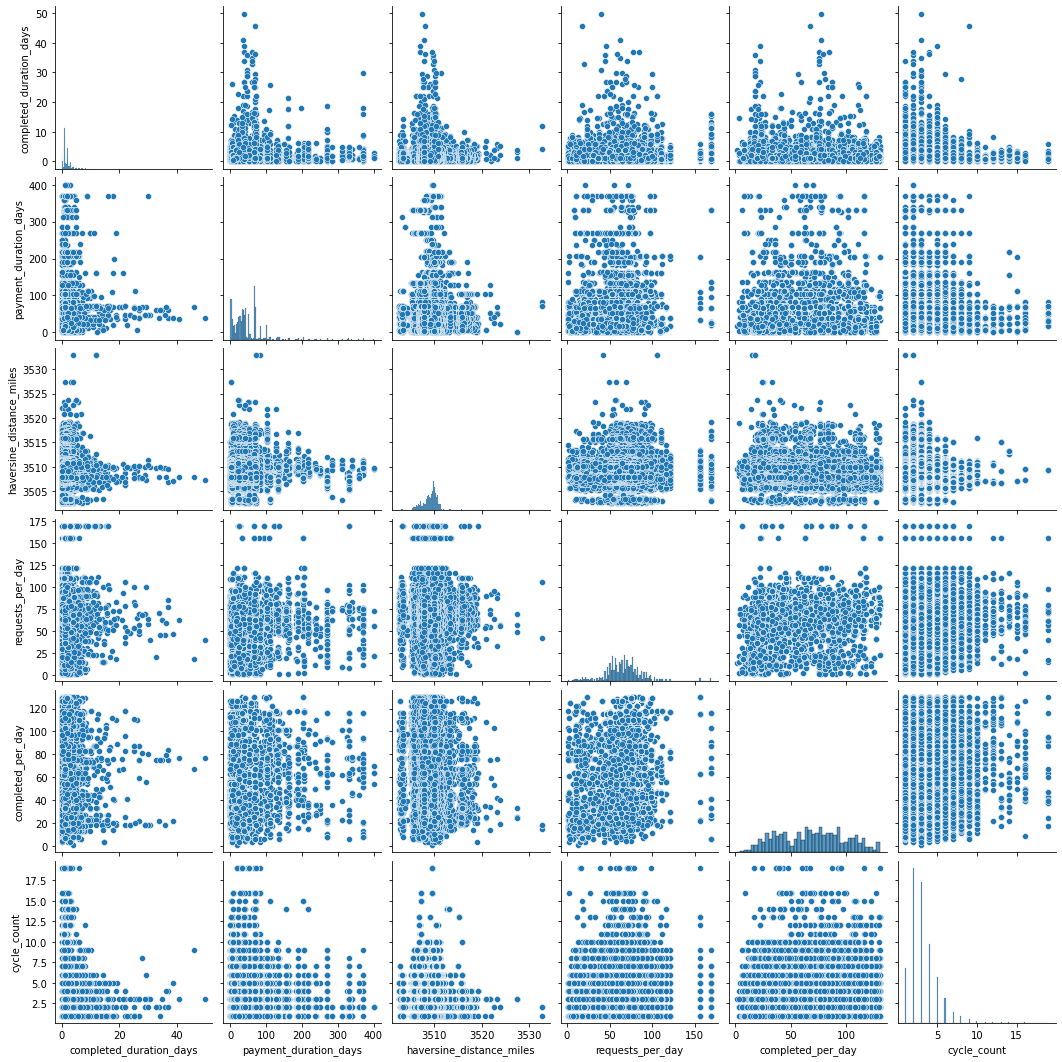

In [14]:
pair_plot = sns.pairplot(df_sub_saleslet2)

The pair plots do not reveal any relevant linear correlation between the current variables.

In [15]:
pair_plot.savefig(os.path.join(vizpath,'Pair Plots.png'))

### Hypothesis: Areas with a greater number of sign requests have shorter completion times.

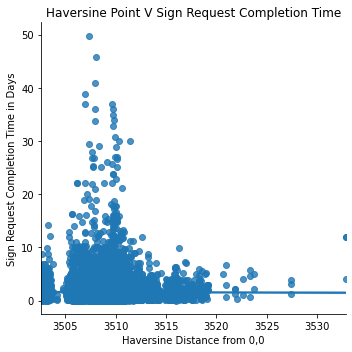

In [11]:
sns.lmplot(x= 'haversine_distance_miles', y= 'completed_duration_days', data= df_sub_saleslet2)

plt.title('Haversine Point V Sign Request Completion Time')
plt.xlabel('Haversine Distance from 0,0')
plt.ylabel('Sign Request Completion Time in Days')
plt.tight_layout()

plt.savefig(os.path.join(vizpath,'H1) Comparing Haversine Point to Completion Duration.png'))

The graph show an almost zero linear correlation between haversine distance and completion duration.

### display number of signs per district Vs completion duration as scatterplot
    1) Import PPD data for district variable.
    2) Keep only Postcode and District from PPD
    3) Remove duplicates.
    4) Combine dataframes on Postcode to obtain District.
    5) Create subset of district, quantity & completion duration.
    6) Calculate the number of sign requests per district.
    7) Calculate the average completion duration in days.
    8) Plot signs_per_district vs completed_duration_days

### Hypothesis 1a): Districts with a greater number of sign requests have a shorter completion duration.

## import PPD

In [6]:
df_ppd = pd.read_csv(os.path.join(dataset,'ppd_BN_PO_RH_2020-21_v1.1.csv'))
df_ppd.head()

,unique_id,sale_price,transfer_date,postcode,property_type,new_property,free_lease,address_1,address_2,road_name,locality,town_city,district,county
0,{B5755FFD-ED91-7D01-E053-6C04A8C036B6},312500,2020-10-07 00:00,BN7 1HD,T,N,F,51,NaN,WARREN DRIVE,NaN,LEWES,LEWES,EAST SUSSEX
1,{B5755FFD-ED92-7D01-E053-6C04A8C036B6},420000,2020-08-25 00:00,BN26 5UP,S,N,F,LABURNUM COTTAGE,NaN,SLOE LANE,ALFRISTON,POLEGATE,WEALDEN,EAST SUSSEX
2,{B5755FFD-ED93-7D01-E053-6C04A8C036B6},710000,2020-10-02 00:00,BN3 4PB,S,N,F,6,NaN,BRITTANY ROAD,NaN,HOVE,BRIGHTON AND HOVE,BRIGHTON AND HOVE
3,{B5755FFD-ED94-7D01-E053-6C04A8C036B6},485000,2020-09-29 00:00,BN2 9UW,T,N,F,8,NaN,TORONTO TERRACE,NaN,BRIGHTON,BRIGHTON AND HOVE,BRIGHTON AND HOVE
4,{B5755FFD-ED95-7D01-E053-6C04A8C036B6},320000,2020-09-25 00:00,BN10 7AY,S,N,F,19,NaN,HIGHVIEW ROAD,TELSCOMBE CLIFFS,PEACEHAVEN,LEWES,EAST SUSSEX


In [13]:
df_ppd.shape

(45317, 14)

### reserve relevant columns

In [7]:
df_ppd = df_ppd[['postcode','district']]
df_ppd.head()

,postcode,district
0,BN7 1HD,LEWES
1,BN26 5UP,WEALDEN
2,BN3 4PB,BRIGHTON AND HOVE
3,BN2 9UW,BRIGHTON AND HOVE
4,BN10 7AY,LEWES


### remove duplicates

In [8]:
df_ppd.shape

(45317, 2)

In [9]:
df_ppd = df_ppd.drop_duplicates()
df_ppd.shape

(24564, 2)

### export for review

In [22]:
df_ppd.to_csv(os.path.join(dataset,'x_district_postcode.csv'), index=False)

### combine dataframe, ensure portal data has uppercase postcode to match PPD

In [10]:
df_saleslet['postcode'] = df_saleslet['postcode'].str.upper()
df_saleslet['postcode'].head()

0    BN1 1EL
1    BN1 1JG
2    BN1 1JG
3    BN1 1UB
4    BN1 1UB
Name: postcode, dtype: object

In [11]:
df_saleslet.shape

(26920, 46)

In [12]:
df_saleslet_ppd = pd.merge(df_saleslet, df_ppd, on=['postcode'])
df_saleslet_ppd.head()

,request_id,request_datetime,completed_datetime,completed_duration_days,completed_duration_hours,agent_name,agent_code,branch_name,branch_code,sign_category,...,month,year,work_category,lead_time,request_date,completed_date,requests_per_day,completed_per_day,cycle_count,district
0,9215,13/10/2020 13:36,18/10/2020 08:52,4.80,115.3,Oakley Property,OAK,OakleyProperty @BrightonLets,701,Letting,...,Oct,2020,Letting,Within Week,13/10/2020,18/10/2020,83,26,1,BRIGHTON AND HOVE
1,9209,13/10/2020 13:29,18/10/2020 08:52,4.81,115.4,Oakley Property,OAK,OakleyProperty @BrightonLets,701,Letting,...,Oct,2020,Letting,Within Week,13/10/2020,18/10/2020,83,26,2,BRIGHTON AND HOVE
2,9209,09/03/2021 11:05,11/03/2021 14:05,2.13,51.0,Oakley Property,OAK,OakleyProperty @BrightonLets,701,Letting,...,Mar,2021,Letting,Within Week,09/03/2021,11/03/2021,73,122,2,BRIGHTON AND HOVE
3,12238,26/02/2021 10:39,28/02/2021 07:54,1.89,45.3,Oakley Property,OAK,OakleyProperty @BrightonSales,702,Sales,...,Feb,2021,Sales,Standard 48hr,26/02/2021,28/02/2021,75,17,1,BRIGHTON AND HOVE
4,9210,13/10/2020 13:30,18/10/2020 08:52,4.81,115.4,Oakley Property,OAK,OakleyProperty @BrightonLets,701,Letting,...,Oct,2020,Letting,Within Week,13/10/2020,18/10/2020,83,26,2,BRIGHTON AND HOVE


In [13]:
df_saleslet_ppd.shape

(21488, 47)

### export to CSV

In [26]:
df_saleslet_ppd.to_csv(os.path.join(dataset,'stone_signs_portal_v3.4_saleslets_lifecycle_district - 21,488.csv'), index=False)

### calculate number of signs per district

In [14]:
df_saleslet_ppd['signs_per_district'] = df_saleslet_ppd.groupby(['district']) ['quantity'].transform(np.sum)

In [15]:
df_saleslet_ppd[['district','signs_per_district']].value_counts()

district           signs_per_district
BRIGHTON AND HOVE  5483                  5483
WORTHING           5351                  5351
ADUR               3449                  3449
LEWES              3442                  3442
ARUN               2374                  2374
CHICHESTER         982                    982
HORSHAM            332                    332
WEALDEN            29                      29
MID SUSSEX         23                      23
CRAWLEY            7                        7
HAVANT             7                        7
EASTBOURNE         3                        3
PORTSMOUTH         3                        3
TANDRIDGE          3                        3
dtype: int64

### calculate avaerage completion duration per district

In [16]:
df_saleslet_ppd['average_completion_days'] = df_saleslet_ppd.groupby(['district']) ['completed_duration_days'].transform(np.mean)

In [17]:
df_saleslet_ppd.head()

,request_id,request_datetime,completed_datetime,completed_duration_days,completed_duration_hours,agent_name,agent_code,branch_name,branch_code,sign_category,...,work_category,lead_time,request_date,completed_date,requests_per_day,completed_per_day,cycle_count,district,signs_per_district,average_completion_days
0,9215,13/10/2020 13:36,18/10/2020 08:52,4.80,115.3,Oakley Property,OAK,OakleyProperty @BrightonLets,701,Letting,...,Letting,Within Week,13/10/2020,18/10/2020,83,26,1,BRIGHTON AND HOVE,5483,1.688152
1,9209,13/10/2020 13:29,18/10/2020 08:52,4.81,115.4,Oakley Property,OAK,OakleyProperty @BrightonLets,701,Letting,...,Letting,Within Week,13/10/2020,18/10/2020,83,26,2,BRIGHTON AND HOVE,5483,1.688152
2,9209,09/03/2021 11:05,11/03/2021 14:05,2.13,51.0,Oakley Property,OAK,OakleyProperty @BrightonLets,701,Letting,...,Letting,Within Week,09/03/2021,11/03/2021,73,122,2,BRIGHTON AND HOVE,5483,1.688152
3,12238,26/02/2021 10:39,28/02/2021 07:54,1.89,45.3,Oakley Property,OAK,OakleyProperty @BrightonSales,702,Sales,...,Sales,Standard 48hr,26/02/2021,28/02/2021,75,17,1,BRIGHTON AND HOVE,5483,1.688152
4,9210,13/10/2020 13:30,18/10/2020 08:52,4.81,115.4,Oakley Property,OAK,OakleyProperty @BrightonLets,701,Letting,...,Letting,Within Week,13/10/2020,18/10/2020,83,26,2,BRIGHTON AND HOVE,5483,1.688152


### export to CSV

In [18]:
df_saleslet_ppd.shape

(21488, 49)

In [19]:
df_saleslet_ppd.to_csv(os.path.join(dataset,'stone_signs_portal_v3.5_saleslets_lifecycle_district - 21,488.csv'), index=False)

### create subset of relavent variables

In [28]:
df_district_duration = df_saleslet_ppd[['district','signs_per_district','average_completion_days']]

In [29]:
df_district_duration.shape

(21488, 3)

### remove duplicates

In [30]:
df_district_duration= df_district_duration.drop_duplicates()
df_district_duration.shape

(14, 3)

In [31]:
df_district_duration

,district,signs_per_district,average_completion_days
0,BRIGHTON AND HOVE,5483,1.688152
1138,LEWES,3442,1.783838
2463,WORTHING,5351,1.331585
4624,ARUN,2374,1.736264
8339,ADUR,3449,1.289971
10919,HORSHAM,332,1.800542
13039,EASTBOURNE,3,1.880000
13042,WEALDEN,29,2.404483
18917,MID SUSSEX,23,2.751739
19394,HAVANT,7,2.551429


### reset_index

In [32]:
df_district_duration = df_district_duration.reset_index(drop=True)
df_district_duration.head()

,district,signs_per_district,average_completion_days
0,BRIGHTON AND HOVE,5483,1.688152
1,LEWES,3442,1.783838
2,WORTHING,5351,1.331585
3,ARUN,2374,1.736264
4,ADUR,3449,1.289971


### check for nulls

In [33]:
df_district_duration.isnull().sum()

district                   0
signs_per_district         0
average_completion_days    0
dtype: int64

### display as scatterplot

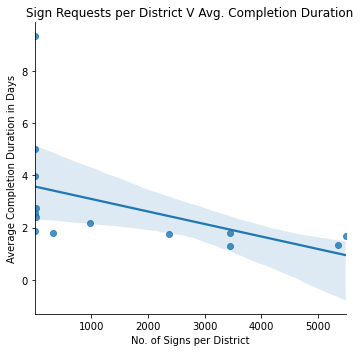

In [36]:
sns.lmplot(x= 'signs_per_district', y= 'average_completion_days', data= df_district_duration)

plt.title('Sign Requests per District V Avg. Completion Duration')
plt.xlabel('No. of Signs per District')
plt.ylabel('Average Completion Duration in Days')
plt.tight_layout()

plt.savefig(os.path.join(vizpath,'H1a) Sign Request per District V Average Completion Duration.png'))

The graph shows a negative correlation between the number of signs per district and the time taken to complete sign requests.

### show the correlation strength

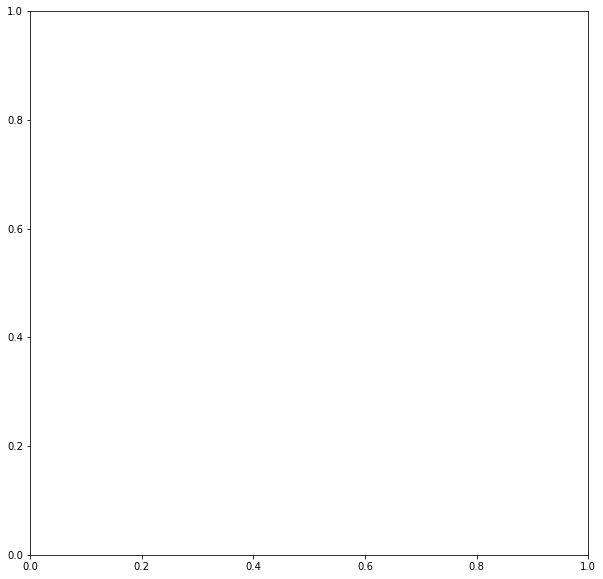

In [39]:
fig_size,axis = plt.subplots(figsize=(10,10))

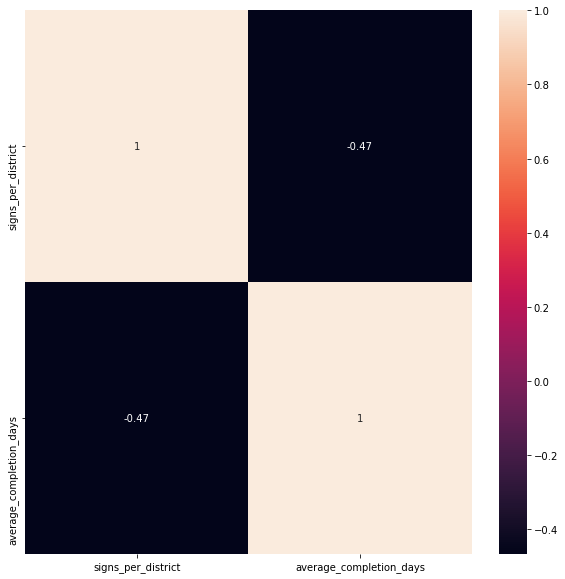

In [40]:
corr_district_duration = sns.heatmap(df_district_duration.corr(), annot= True, ax= axis)
corr_district_duration.figure

Correlation strength between the number of sign requests per District and the completion duration is -0.47, a moderate relationship.

### export subset for review

In [41]:
df_district_duration.to_csv(os.path.join(dataset,'x_district_duration - 14.csv'), index=False)

# Linear Regression Analysis
NB: There are not actually enough data points to carry out an effective linear regression.  The recommended number of data points should exceed 5,000 for effective model training.  However, the following script covers the Linear Regression process as a practice.

### reshape the data points into NumPy arrays, and place in seperate objects X (independent) and y (dependent)

In [42]:
X = df_district_duration['signs_per_district'].values.reshape(-1,1)
X

array([[5483],
       [3442],
       [5351],
       [2374],
       [3449],
       [ 332],
       [   3],
       [  29],
       [  23],
       [   7],
       [ 982],
       [   7],
       [   3],
       [   3]], dtype=int64)

In [43]:
y = df_district_duration['average_completion_days'].values.reshape(-1,1)
y

array([[1.68815247],
       [1.78383788],
       [1.33158475],
       [1.73626369],
       [1.28997101],
       [1.80054217],
       [1.88      ],
       [2.40448276],
       [2.75173913],
       [2.55142857],
       [2.15632383],
       [5.02571429],
       [3.98666667],
       [9.34666667]])

### split X and y data into Training and Test sets - 70:30

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### create a regression line to fit into the Training set

In [45]:
regression = LinearRegression()
regression.fit(X_train, y_train)

LinearRegression()

Data is now trained on the Training set and must now be tested on the Test set.

### predict the values of y (Dependent variable) using X (Independent variable) on the Test set

In [46]:
y_predicted = regression.predict(X_test)

### create a plot that shows the regression line from the model Test set

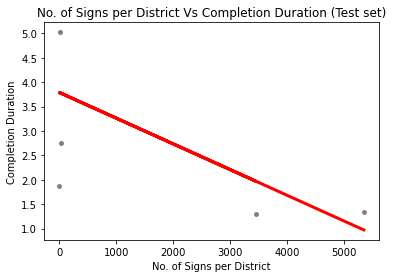

In [47]:
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)

plot_test.title('No. of Signs per District Vs Completion Duration (Test set)')
plot_test.xlabel('No. of Signs per District')
plot_test.ylabel('Completion Duration')

plt.savefig(os.path.join(vizpath,'H1a) Sign Requests per District V Completion Duration (Test Set).png'))

### calculate the summary statistics for the above plot

  - 1)	Correlation Coefficient or Pearson's r: the strength of a relationship between the independent and dependent variable (-1 to +1)
  - 2)	R-Squared or Coefficient of Determination: a measure of how well the regression predictions approximate the real data points (%).
  - 3)	Root Mean Squared Error (RMSE): a single measure of predictive accuracy and explains the difference between the actual data points and the predicted data points (value relative to data, small error is better fit).
  - 4)	Slope Coefficient:  The regression line fit to the data based on the 'rate of change of y as per X value' (%).

In [48]:
r2 = r2_score(y_test, y_predicted)
r2

0.2916529446274303

In [49]:
mse = mean_squared_error(y_test, y_predicted)
mse

1.3666284546755612

### print the predictive model statistics to assess the performance

In [50]:
print('R2 Score: ', r2)
print('Mean Squared Error (in units2): ', mse)
print('Slope Coefficient:' ,regression.coef_)

R2 Score:  0.2916529446274303
Mean Squared Error (in units2):  1.3666284546755612
Slope Coefficient: [[-0.0005269]]


#### H1a) Interpretation:
  - 1)	Correlation Coefficient or Pearson's r: 0.54 - a Moderate correlation
  - 2)	R-Squared or Coefficient of Determination (%): 0.292 - The trained model fits 29% of the actual data points in the Test set.
  - 3)	Mean Squared Error (MSE): 1.3666  ->  RMSE: 1.169 - A small error value for a 29% fit to the data with a moderate correlation.
  - 4)	Slope Coefficient (%): -0.00053 - y changes by -0.00053 with a change in X.

The above interpretation can be proved by applying the regression line to the test set & comparing the actual values to the predicted values.

In [51]:
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data

,Actual,Predicted
0,2.751739,3.779243
1,1.880000,3.789781
2,1.289971,1.974092
3,5.025714,3.787673
4,1.331585,0.971933


In [52]:
y_predicted_train = regression.predict(X_train)

### compare statistics

In [53]:
mse_y = mean_squared_error(y_train, y_predicted_train)
r2_y = r2_score(y_train, y_predicted_train)

In [54]:
print('R2 score: ', r2_y)
print('Mean squared error: ', mse_y)
print('Slope:' ,regression.coef_)

R2 score:  0.17561408596746286
Mean squared error:  4.46396908795619
Slope: [[-0.0005269]]


Comparing the fit of the model to the Training set (which was used to create the model):
  - 1)	Correlation Coefficient or Pearson's r: 0.42 - still a Moderate correlation but slightly smaller result than when model applied to Test Set.
  - 2)	R-Squared or Coefficient of Determination (%): 0.176 - The trained model fits 18% of the actual data points.
  - 3)	Mean Squared Error (MSE): 4.4639  ->  RMSE: 2.113 - A slightly larger error for the Training set, than the test set, even though the model was formed around the Training set.
  - 4)	Slope Coefficient (%): -0.00053 - y changes by -0.00053 with a change in X. - The same in both Sets.

### show as training set visualisation

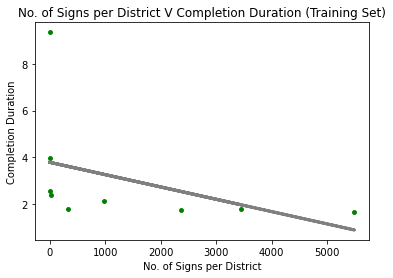

In [55]:
plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='gray', linewidth =3)

plot_test.title('No. of Signs per District V Completion Duration (Training Set)')
plot_test.xlabel('No. of Signs per District')
plot_test.ylabel('Completion Duration')

plt.savefig(os.path.join(vizpath,'H1a) Sign Requests per District Vs Sign Completion Duration (Training set).png'))